In [1]:
pip install pmlb

Note: you may need to restart the kernel to use updated packages.


# Part 2

#### <u>Loading the 529 pollen datase and preliminary data analysis</u>

In [2]:
from pmlb import fetch_data
import numpy as np

In [3]:
# fetch the data
X, y = fetch_data('529_pollen', return_X_y=True)

In [4]:
# preliminary data analysis
print("the number of samples in the dataset are: ", X.shape[0])
print("the dimensrion (or features) of each data sample is: ", X.shape[1])
print("the mean value of the mean fetures values of the dataset: {:.3f}".format(np.mean(X)))
print("the variance is: {:.3f}".format(np.var(X)))
print("Minimum feature value: {:.3f}".format(X.min()))
print("Maximum feature value: {:.3f}".format(X.max()))
print("Median: {:.3f}".format(np.median(X)))

the number of samples in the dataset are:  3848
the dimensrion (or features) of each data sample is:  4
the mean value of the mean fetures values of the dataset: 0.001
the variance is: 57.664
Minimum feature value: -34.035
Maximum feature value: 35.803
Median: -0.144


#### <u>splitting the dataset and training</u>

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
def split_train_eval(X,y):
    mse_arr = []
    sc = StandardScaler()
    sc.fit(X)
    scaled_X = sc.transform(X)
    for r in np.arange(0.1, 1.0, 0.1):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = r)
      regressor = LinearRegression()
      regressor.fit(X_train, y_train)  
      y_pred = regressor.predict(X_test)
      mse = mean_squared_error(y_test, y_pred)
      mse_arr.append(mse)
    return np.array(mse_arr)

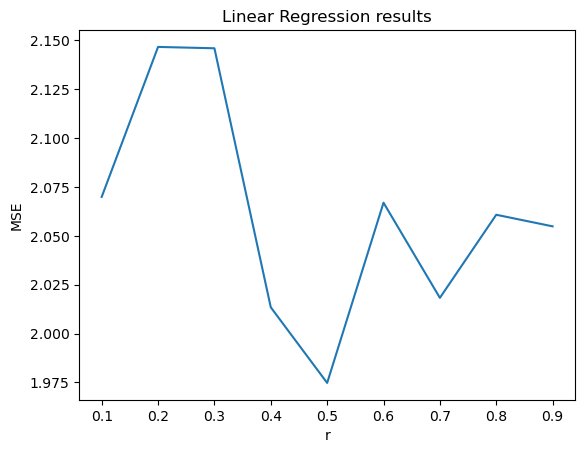

In [7]:
# splitting the dataset, training it and eval
mse_arr = split_train_eval(X, y)

plt.plot(np.arange(0.1, 1.0, 0.1), mse_arr)
plt.title('Linear Regression results')
plt.ylabel('MSE')
plt.xlabel('r')
plt.show()

#### <u>naive k-features selection algorithm with k=2 and 3</u>

In [8]:
from itertools import combinations
from tqdm import tqdm

In [9]:
def select_k_features(X_train, X_test, y_train, y_test, k):
    n_features = X_train.shape[1]
    feature_indices = list(range(n_features))
    best_mse = np.inf
    best_features = []
    
    # Generate all possible combinations of k features
    feature_combinations = list(combinations(feature_indices, k))
    
    # For each combination of features, train a linear regression model on the training set
    # and evaluate its mean squared error on the test set
    for features in tqdm(feature_combinations):
        regressor = LinearRegression()
        regressor.fit(X_train[:, features], y_train)
        y_pred = regressor.predict(X_test[:, features])
        mse = mean_squared_error(y_test, y_pred)
        
        # If this set of features is the best so far, update the best_features and best_mse variables
        if mse < best_mse:
            best_mse = mse
            best_features = features
    
    return best_features, best_mse

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data into train and test sets
for k in (2, 3):
    best_features, mse = select_k_features(X_train, X_test, y_train, y_test, k)
    print("Best {} features: {}".format(k, best_features))
    print("MSE: {:.2f}".format(mse))

100%|██████████| 6/6 [00:00<00:00, 417.52it/s]


Best 2 features: (0, 3)
MSE: 3.23


100%|██████████| 4/4 [00:00<?, ?it/s]

Best 3 features: (0, 1, 3)
MSE: 2.11
